<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20F/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Diffenentiation: This is the problem of evaluating the derivative of a function without sybolically computing an analytical solution. This comes up in many situations, for instance when the derivative does not exist. Fluid dynamics is a big field for this.

Finite Difference Approximation: The practive of evaluating a derivative by finding the slope between two points which are very close to the point at which we wish to measure the derivative. This gives a reasonable estimate to what the derivative might be without requiring us to actually compute the derivative.

Three standard equations exist for computing this finite differece:

Forward Difference: f'(x) = (f(x + h) - f(x)) / h

Backward Difference: f'(x) = (f(x) - f(x - h)) / h

Central Difference: f'(x) = (f(x + h) - f(x - h)) / 2h

Central has the least error, while backwards is useful in situations when we only know past data.

This method can also be applied to solving second order derivatives, this is used extensively to solve equations like Wave Function or the Heat Equation.

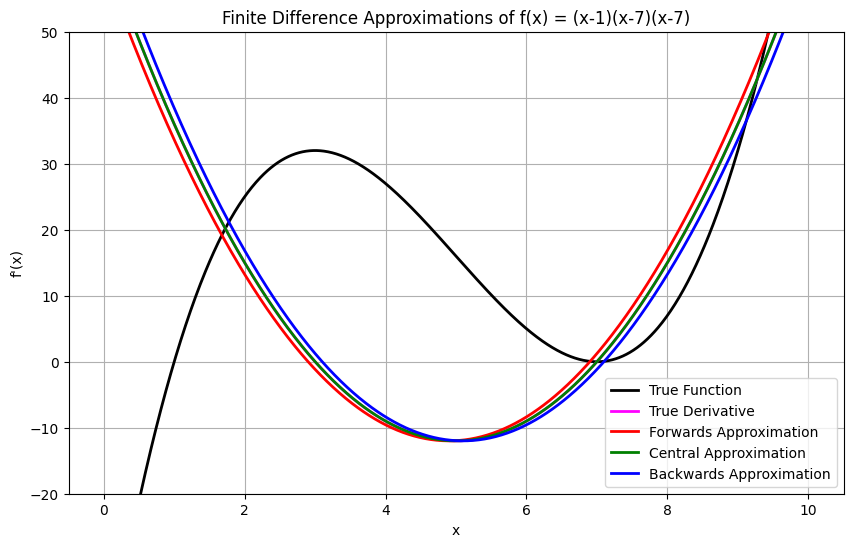

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def evaluate(function, x_data):
    y = []
    for x in x_data:
        y.append(function(x))
    return y


def forwards_approx(function, x, h = 0.2):
    return (function(x + h) - function(x)) / h


def central_approx(function, x, h = 0.1):
    return (function(x + h) - function(x - h)) / (2*h)


def backwards_approx(function, x, h = 0.2):
    return (function(x) - function(x - h)) / h


if __name__ == "__main__":

    func = lambda x: 1*(x-1)*(x-7)*(x-7)
    deriv = lambda x: 1*3*(x-7)*(x-3)

    x_data = np.linspace(0, 10, 1000)

    value_y = evaluate(func, x_data)
    true_y = evaluate(deriv, x_data)
    forward_y = evaluate(lambda x: forwards_approx(func, x), x_data)
    central_y = evaluate(lambda x: central_approx(func, x), x_data)
    backwards_y = evaluate(lambda x: backwards_approx(func, x), x_data)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, value_y, label='True Function', color='black', linewidth=2)
    plt.plot(x_data, true_y, label='True Derivative', color='magenta', linewidth=2)
    plt.plot(x_data, forward_y, label='Forwards Approximation', color='red', linewidth=2)
    plt.plot(x_data, central_y, label='Central Approximation', color='green', linewidth=2)
    plt.plot(x_data, backwards_y, label='Backwards Approximation', color='blue', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f\'(x)')
    plt.title('Finite Difference Approximations of f(x) = (x-1)(x-7)(x-7)')
    plt.legend()
    plt.grid(True)
    plt.ylim(-20, 50)

    plt.show()


Approximating Higher Order Derivatives: higher order derivatives are not typically approximated with Finite Difference Approximation. Something like a Taylor series would be more common.

A Taylor Series expansion shows how to approximate a function using more and more terms, these expansions can be solved to create an estimate of the Nth derivative using many points along the function f. Below is an example that works for low levels of derivatives.

<ipython-input-2-571c64985eb9>:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return [derivative(f, x0, dx=h, n=i, order=2*i+1) / np.math.factorial(i) for i in range(n)]
<ipython-input-2-571c64985eb9>:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return [derivative(f, x0, dx=h, n=i, order=2*i+1) / np.math.factorial(i) for i in range(n)]
<ipython-input-2-571c64985eb9>:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return [derivative(f, x0, dx=h, n=i, order=2*i+1) / np.math.f

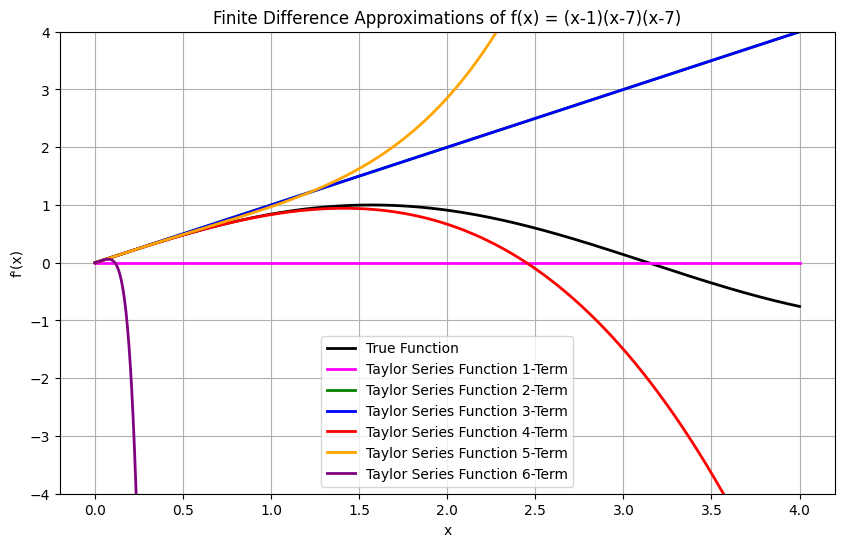

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import math

# signList = [0, 1, 0, -1]
# def taylor_numeric(f, x0, n, h=1e-5): # only works for sin at x0 = 0
    # return [signList[i % 4] / math.factorial(i) for i in range(n)]
def taylor_numeric(f, x0, n, h=1e-5):
    return [derivative(f, x0, dx=h, n=i, order=2*i+1) / np.math.factorial(i) for i in range(n)]


def evaluate_taylor(x, taylor_coefficients, x0, start = 0, end = -1):
    if (end == -1): end = len(taylor_coefficients)

    result = 0.0
    for i in range(start, end):
        result += taylor_coefficients[i] * (x - x0)**i

    return result


def evaluate(function, x_data):
    y = []
    for x in x_data:
        y.append(function(x))
    return y


if __name__ == "__main__":

    x0 = 0
    coeffs_1 = taylor_numeric(np.sin, x0, 1)
    coeffs_2 = taylor_numeric(np.sin, x0, 2)
    coeffs_3 = taylor_numeric(np.sin, x0, 3)
    coeffs_4 = taylor_numeric(np.sin, x0, 4)
    coeffs_5 = taylor_numeric(np.sin, x0, 5)
    coeffs_6 = taylor_numeric(np.sin, x0, 6)

    x_data = np.linspace(0, 4, 1000)

    y_true = np.sin(x_data)
    y_taylor_1 = evaluate(lambda x: evaluate_taylor(x, coeffs_1, x0), x_data)
    y_taylor_2 = evaluate(lambda x: evaluate_taylor(x, coeffs_2, x0), x_data)
    y_taylor_3 = evaluate(lambda x: evaluate_taylor(x, coeffs_3, x0), x_data)
    y_taylor_4 = evaluate(lambda x: evaluate_taylor(x, coeffs_4, x0), x_data)
    y_taylor_5 = evaluate(lambda x: evaluate_taylor(x, coeffs_5, x0), x_data)
    y_taylor_6 = evaluate(lambda x: evaluate_taylor(x, coeffs_6, x0), x_data)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_true, label='True Function', color='black', linewidth=2)
    plt.plot(x_data, y_taylor_1, label='Taylor Series Function 1-Term', color='magenta', linewidth=2)
    plt.plot(x_data, y_taylor_2, label='Taylor Series Function 2-Term', color='green', linewidth=2)
    plt.plot(x_data, y_taylor_3, label='Taylor Series Function 3-Term', color='blue', linewidth=2)
    plt.plot(x_data, y_taylor_4, label='Taylor Series Function 4-Term', color='red', linewidth=2)
    plt.plot(x_data, y_taylor_5, label='Taylor Series Function 5-Term', color='orange', linewidth=2)
    plt.plot(x_data, y_taylor_6, label='Taylor Series Function 6-Term', color='purple', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f\'(x)')
    plt.title('Finite Difference Approximations of f(x) = (x-1)(x-7)(x-7)')
    plt.legend()
    plt.grid(True)
    plt.ylim(-4, 4)

    plt.show()